# pyICON.view for NextGems with xarray/dask from intake catalogue

Load the necessary modules:

In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#import pyicon_jupyter as jup
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np
import xarray as xr
import intake
import sys

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


## Open data set with intake

In [3]:
col_url = "/pf/k/k202134/DYAMOND/Processing/NextGEMS_catalog-2021-11-03.json"
col_orig = intake.open_esm_datastore(col_url)

In [4]:
# [print(l) for l in list(col_orig.df['filename'])]

In [5]:
col = col_orig.search(ensemble_member='dpp0054')

In [6]:
# [print(l) for l in list(col.df['filename'])]

In [7]:
# # --- oce 3D
# col = col.search(filename='.*oce_3du200m.*',)
# dset_dicts = col.to_dataset_dict(cdf_kwargs={'chunks': dict(time=1, depth=1,)})
# ds = dset_dicts[list(dset_dicts.keys())[0]]

In [8]:
# --- atm 3D
col = col.search(filename='.*atm_3d.*', variable=['ua', 'va'])
dset_dicts = col.to_dataset_dict(cdf_kwargs={'chunks': dict(time=1, depth=1,)})
ds = dset_dicts[list(dset_dicts.keys())[0]]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment.domain.frequency.grid.level_type.ensemble_member.operation'


## Update xarray object

In [9]:
ds['ke'] = 0.5*(ds['ua']**2+ds['va']**2) # for atm
# ds['ke'] = 0.5*(ds['u']**2+ds['v']**2) # for oce
ds['ke'] = ds['ke'].assign_attrs({'long_name': 'kinetic energy', 'units': 'm^2/s^2'})

In [10]:
list(ds.keys())

['ua', 'va', 'ke']

## Interactive plot

<IPython.core.display.Javascript object>


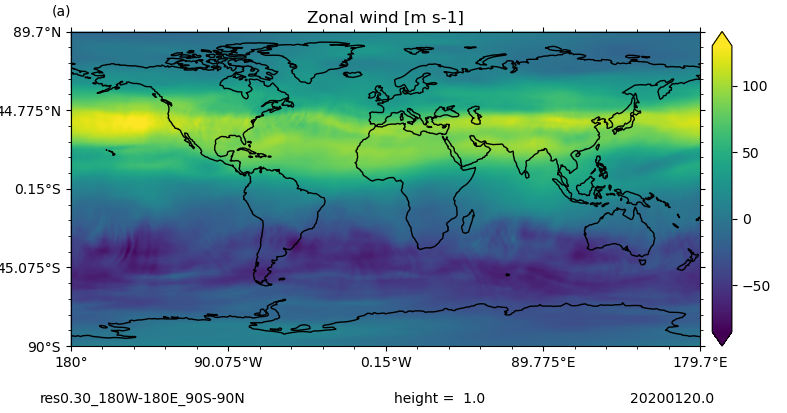

Output()

In [11]:
PyicV = pyic.view.hplot_xr(ds, 
#                    lon_reg=[-85,-75], lat_reg=[19,24], # comment this line to get global plot (be careful his tgrid)
#                    lon_reg=[-180,180], lat_reg=[-90,90],
                   land_facecolor='none', # comment this line and get land masses filled
#                    logplot=True, # maybe you want to use this for plotting ke
                  )

# Compare two datasets

In [12]:
col = col_orig.search(
    ensemble_member=['dpp0054', 'dpp0056'],
    filename='.*atm_3d.*',
    variable=['ua', 'va'],
    operation='mean',
)
dset_dicts = col.to_dataset_dict(cdf_kwargs={'chunks': dict(time=1, height=1,)})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment.domain.frequency.grid.level_type.ensemble_member.operation'


In [13]:
dset_dicts.keys()

dict_keys(['NextGEMS.MPIM-DWD-DKRZ.ICON-SAP-5km.Cycle1.atm.3hr.gn.ml.dpp0056.mean', 'NextGEMS.MPIM-DWD-DKRZ.ICON-SAP-5km.Cycle1.atm.3hr.gn.ml.dpp0054.mean'])

In [14]:
ds = (
    dset_dicts['NextGEMS.MPIM-DWD-DKRZ.ICON-SAP-5km.Cycle1.atm.3hr.gn.ml.dpp0056.mean']
    - dset_dicts['NextGEMS.MPIM-DWD-DKRZ.ICON-SAP-5km.Cycle1.atm.3hr.gn.ml.dpp0054.mean']
)

<IPython.core.display.Javascript object>


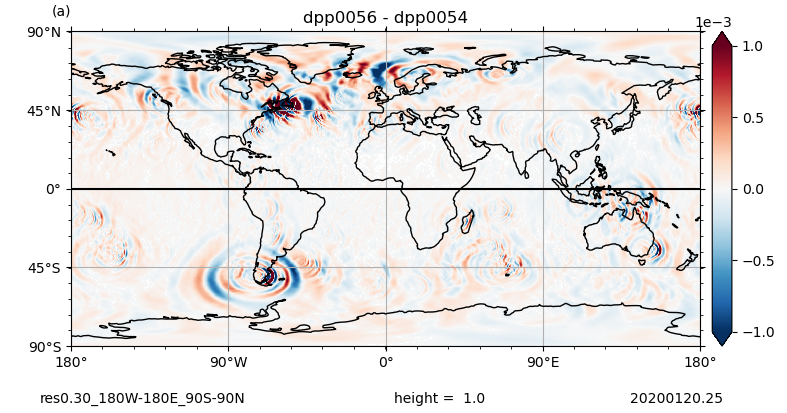

Output()

In [15]:
PyicV = pyic.view.hplot_xr(ds, land_facecolor='none', title='dpp0056 - dpp0054')

In [16]:
PyicV.ax.axhline(0., color='k')
PyicV.ax.grid(True, zorder=20)
PyicV.ax.set_xticks(np.linspace(-180,180,5))
PyicV.ax.set_yticks(np.linspace(-90,90,5))